In [2]:
# Importing images in AWS
import csv
#import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
%matplotlib inline

images = []
measurements = []
lines0 = []
S = np.array([0, 1, -1])
correction = random.random()*0.1
print(correction)

moving_avg = [0,0,0,0]

for i in range(8):
    print(i+1)
    lines = []
    with open('./data{}/driving_log.csv'.format(i+1)) as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:            
            lines.append(line)
            for k in range(3):
                lines0.append(line)


0.062239852502473096
1
2
3
4
5
6
7
8


"\n    for line in lines:       \n        for k in range(3):\n            source_path = line[k]\n            filename = source_path.split('\\')[-1]\n            current_path = './data{}/IMG/'.format(i+1) + filename#'C:/SDCND/Project3/mydata/IMG' + filename\n            image = mpimg.imread(current_path)\n            images.append(image)\n            measurement = float(line[3]) + S[k] * correction\n            measurements.append(measurement)\n"

In [3]:

print("{} pictures, i.e., {} for training and {} for validation.".format(3*len(lines0),round(0.8*3*len(lines0)),round(0.2*3*len(lines0))))
print("With flipping, we have {}  images for training.".format(round(0.8*3*2*len(lines0))))
print("If we only use the center image and flipping, we have {} images for training.".format(round(0.8*2*len(lines0))))

284193 pictures, i.e., 227354 for training and 56839 for validation.
With flipping, we have 454709  images for training.
If we only use the center image and flipping, we have 151570 images for training.


In [4]:
import matplotlib.pyplot as plt
import skimage.measure
import scipy

pic = 1750

img_flip_x = np.fliplr(X_train[1])
plt.imshow(X_train[pic])
#plt.figure()
#plt.imshow(img_flip_x)
#print(img_flip_x.shape)
print(X_train[1][:,:,0].shape)


# Here, we want to decide how much we can reduce the size of the input without loosing too much information.
# We can see that using a 2x2 max pooling filter one or two times may be a good choice. Using it three times
# leads to an image that might have a resolution that is too low.

a1 = skimage.measure.block_reduce(X_train[pic], (2,2,1), np.max)
a2 = skimage.measure.block_reduce(a1, (2,2,1), np.max)
a3 = skimage.measure.block_reduce(a2, (2,2,1), np.max)
b1 = skimage.measure.block_reduce(X_train[pic], (2,2,1), np.min)
b2 = skimage.measure.block_reduce(b1, (2,2,1), np.min)
b3 = skimage.measure.block_reduce(b2, (2,2,1), np.min)
c1 = scipy.misc.imresize(X_train[pic], (80,160,3))
c2 = scipy.misc.imresize(c1, (40,80,3))
c3 = scipy.misc.imresize(c2, (20,40,3))
d1 = scipy.misc.imresize(b2, (20,40,3))
d2 = scipy.misc.imresize(a2, (20,40,3))
d3 = skimage.measure.block_reduce(b2, (2,2,1), np.max)

fig, sub_fig = plt.subplots(4,3, figsize = (32,25))
sub_fig[0,0].set_title('1x Max Pooling', fontsize=25, fontweight='bold')
sub_fig[0,0].imshow(a1)
sub_fig[0,1].set_title('2x Max Pooling', fontsize=25, fontweight='bold')
sub_fig[0,1].imshow(a2)
sub_fig[0,2].set_title('3x Max Pooling', fontsize=25, fontweight='bold')
sub_fig[0,2].imshow(a3)
sub_fig[1,0].set_title('1x Min Pooling', fontsize=25, fontweight='bold')
sub_fig[1,0].imshow(b1)
sub_fig[1,1].set_title('2x Min Pooling', fontsize=25, fontweight='bold')
sub_fig[1,1].imshow(b2)
sub_fig[1,2].set_title('3x Min Pooling', fontsize=25, fontweight='bold')
sub_fig[1,2].imshow(b3)
sub_fig[2,0].set_title('1x Avg Pooling', fontsize=25, fontweight='bold')
sub_fig[2,0].imshow(c1)
sub_fig[2,1].set_title('2x Avg Pooling', fontsize=25, fontweight='bold')
sub_fig[2,1].imshow(c2)
sub_fig[2,2].set_title('3x Avg Pooling', fontsize=25, fontweight='bold')
sub_fig[2,2].imshow(c3)
sub_fig[3,0].set_title('2x Min 1x Avg Pooling', fontsize=25, fontweight='bold')
sub_fig[3,0].imshow(d1)
sub_fig[3,1].set_title('2x Max 1x Avg Pooling', fontsize=25, fontweight='bold')
sub_fig[3,1].imshow(d2)
sub_fig[3,2].set_title('2x Min 1x Max Pooling', fontsize=25, fontweight='bold')
sub_fig[3,2].imshow(d3)


NameError: name 'X_train' is not defined

In [50]:
from sklearn.model_selection import train_test_split
train_samples, validation_samples = train_test_split(lines0, test_size=0.2)
print(len(train_samples))
print(len(validation_samples))

75784
18947


In [51]:
# Generator
import sklearn
import os
from random import shuffle



def tryout(name): #prepare for ugly code
    try:
        cur_path = './data1/IMG/' + name
        img = mpimg.imread(cur_path)
    except:
        try:
            cur_path = './data2/IMG/' + name
            img = mpimg.imread(cur_path)
        except:
            try:
                cur_path = './data3/IMG/' + name
                img = mpimg.imread(cur_path)
            except:
                try:
                    cur_path = './data4/IMG/' + name
                    img = mpimg.imread(cur_path)
                except:
                    try:
                        cur_path = './data5/IMG/' + name
                        img = mpimg.imread(cur_path)
                    except:
                        try:
                            cur_path = './data6/IMG/' + name
                            img = mpimg.imread(cur_path)
                        except:
                            try:
                                cur_path = './data7/IMG/' + name
                                img = mpimg.imread(cur_path)
                            except:
                                cur_path = './data8/IMG/' + name
                                img = mpimg.imread(cur_path)
    return img
                  

def generator(samples, batch_size = 32):
    num_samples = len(samples)
    while 1:
        shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]
            
            images = []
            angles = []
            for batch_sample in batch_samples:
                for k in range(3):
                    name = batch_sample[k].split('\\')[-1]
                    center_image = tryout(name)
                    center_image_flipped = np.fliplr(center_image)                                  
                    center_angle = float(batch_sample[3]) +S[k] * 0.05
                    images.append(center_image)
                    angles.append(center_angle)
                    images.append(center_image_flipped)
                    angles.append(-center_angle)
                
            X_train = np.array(images)
            y_train = np.array(angles)

            yield sklearn.utils.shuffle(X_train, y_train)


In [52]:
train_generator = generator(train_samples, batch_size = 8)
validation_generator = generator(validation_samples, batch_size = 8)

factor = 6

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_37 (InputLayer)            (None, 160, 320, 3)   0                                            
____________________________________________________________________________________________________
cropping2d_37 (Cropping2D)       (None, 60, 320, 3)    0           input_37[0][0]                   
____________________________________________________________________________________________________
lambda_109 (Lambda)              (None, 60, 320, 3)    0           cropping2d_37[0][0]              
____________________________________________________________________________________________________
lambda_110 (Lambda)              (None, 60, 320, 3)    0           lambda_109[0][0]                 
___________________________________________________________________________________________

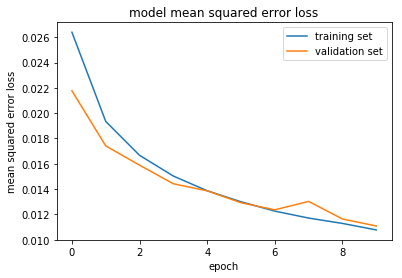

In [53]:
# Building and Training the model

from keras.models import Sequential
#from keras.layers import Flatten, Dense, Convolution2D
from keras import *
from keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Dropout, Lambda, Flatten, Dense, Reshape, Input, merge, normalization, Cropping2D
from keras.models import Model
import tensorflow as tf

inp = Input(shape=(160,320,3))
layer_0  = Cropping2D(cropping=((80,20), (0,0)))(inp)
layer_1  = Lambda(lambda x: x/127.5 - 1)(layer_0)
layer_2  = Lambda(lambda x: -x)(layer_1)
layer_3  = MaxPooling2D()(layer_2)
layer_4  = MaxPooling2D((1,4))(layer_3)
layer_5  = Lambda(lambda x: -x)(layer_4)
conv1    = Conv2D(30,3,3, border_mode='same', activation='relu')(layer_4) #100
conv2    = Conv2D(15,1,1, border_mode='same', activation='relu')(layer_4) #50
conv3    = Conv2D(15,5,5, border_mode='same', activation='relu')(layer_4) #50
merge1   = merge([conv1, conv2, conv3], mode = 'concat', concat_axis = -1)
layer_6  = MaxPooling2D()(merge1)
layer_6  = normalization.BatchNormalization()(layer_6)
layer_8  = Conv2D(20,3,3, border_mode='same', activation='relu')(layer_6) #20
layer_10 = MaxPooling2D()(layer_8)
layer_10 = normalization.BatchNormalization()(layer_10)
layer_10b= Conv2D(10,3,3, border_mode='same', activation='relu')(layer_10) #20
layer_11 = Flatten()(layer_10b)
layer_13 = Dense(50, activation='relu')(layer_11)
layer_16 = Dense(30, activation='relu')(layer_13)
outlayer = Dense(1)(layer_16)

model = model = Model(input=inp, output=outlayer)
model.summary()


def myloss_y(y_true, y_pred):
    h_bool = tf.less_equal(tf.abs(y_true), tf.constant(0.1))
    return tf.reduce_mean(tf.square(y_pred - y_true) + 0.05 * tf.cast(h_bool,tf.float32), axis = -1)


model.compile(loss = 'mse', optimizer='adam')
checkpointer = callbacks.ModelCheckpoint(filepath='./model_both_17.hdf5', verbose=1, save_best_only=True)
history_object = model.fit_generator(train_generator, samples_per_epoch = factor*len(train_samples), validation_data = validation_generator, nb_val_samples = factor*len(validation_samples), nb_epoch = 10, callbacks=[checkpointer])


print(history_object.history.keys())

plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

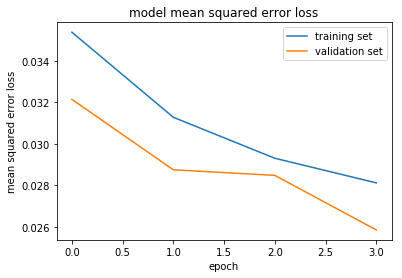

In [9]:
plt.plot(history_object.history['loss'][1:])
plt.plot(history_object.history['val_loss'][1:])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

In [ ]:
# Train with new data

from keras.models import load_model
import csv
#import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import *
from keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Dropout, Lambda, Flatten, Dense, Reshape, Input, merge
from keras.models import Model
        
lines = []
with open('./data4/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
        
images = []
measurements = []
for line in lines:
    source_path = line[0]
    filename = source_path.split('\\')[-1]
    current_path = './data4/IMG/' + filename#'C:/SDCND/Project3/mydata/IMG' + filename
    image = mpimg.imread(current_path)
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)
    
X_train = np.array(images)
y_train = np.array(measurements)


train_samples, validation_samples = train_test_split(lines, test_size=0.2)
train_generator = generator(train_samples, batch_size = 32)
validation_generator = generator(validation_samples, batch_size = 32)


model_2 = load_model('mychecks2.hdf5')
checkpointer = callbacks.ModelCheckpoint(filepath='./mychecks3.hdf5', verbose=1, save_best_only=True)
history_object = model_2.fit_generator(train_generator, samples_per_epoch = 2*len(train_samples), validation_data = validation_generator, nb_val_samples = 2*len(validation_samples), nb_epoch = 5, callbacks=[checkpointer])
model_2.save('mymodel3.h5')


print(history_object.history.keys())

plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

Epoch 1/10
4832/4832 [==============================] - 38s - loss: 0.0177 - val_loss: 0.0163
Epoch 2/10
4832/4832 [==============================] - 33s - loss: 0.0112 - val_loss: 0.0133
Epoch 3/10
4832/4832 [==============================] - 33s - loss: 0.0104 - val_loss: 0.0132
Epoch 4/10
4832/4832 [==============================] - 33s - loss: 0.0106 - val_loss: 0.0131
Epoch 5/10
4832/4832 [==============================] - 33s - loss: 0.0102 - val_loss: 0.0120
Epoch 6/10
4832/4832 [==============================] - 33s - loss: 0.0097 - val_loss: 0.0122
Epoch 7/10
4832/4832 [==============================] - 33s - loss: 0.0093 - val_loss: 0.0113
Epoch 8/10
4832/4832 [==============================] - 33s - loss: 0.0093 - val_loss: 0.0107
Epoch 9/10
4832/4832 [==============================] - 33s - loss: 0.0089 - val_loss: 0.0105
Epoch 10/10
 960/4832 [====>.........................] - ETA: 24s - loss: 0.0081

In [ ]:
# Train with all data

from keras.models import load_model
import csv
#import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import *
from keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Dropout, Lambda, Flatten, Dense, Reshape, Input, merge
from keras.models import Model

model_2 = load_model('mychecks2.hdf5')
checkpointer = callbacks.ModelCheckpoint(filepath='./mychecks3.hdf5', verbose=1, save_best_only=True)
history_object = model_2.fit_generator(train_generator, samples_per_epoch = 2*len(train_samples), validation_data = validation_generator, nb_val_samples = 2*len(validation_samples), nb_epoch = 10, callbacks=[checkpointer])
model_2.save('mymodel3.h5')